Группа Адыгейского государственного университета (АГУ)

https://vk.com/agu01

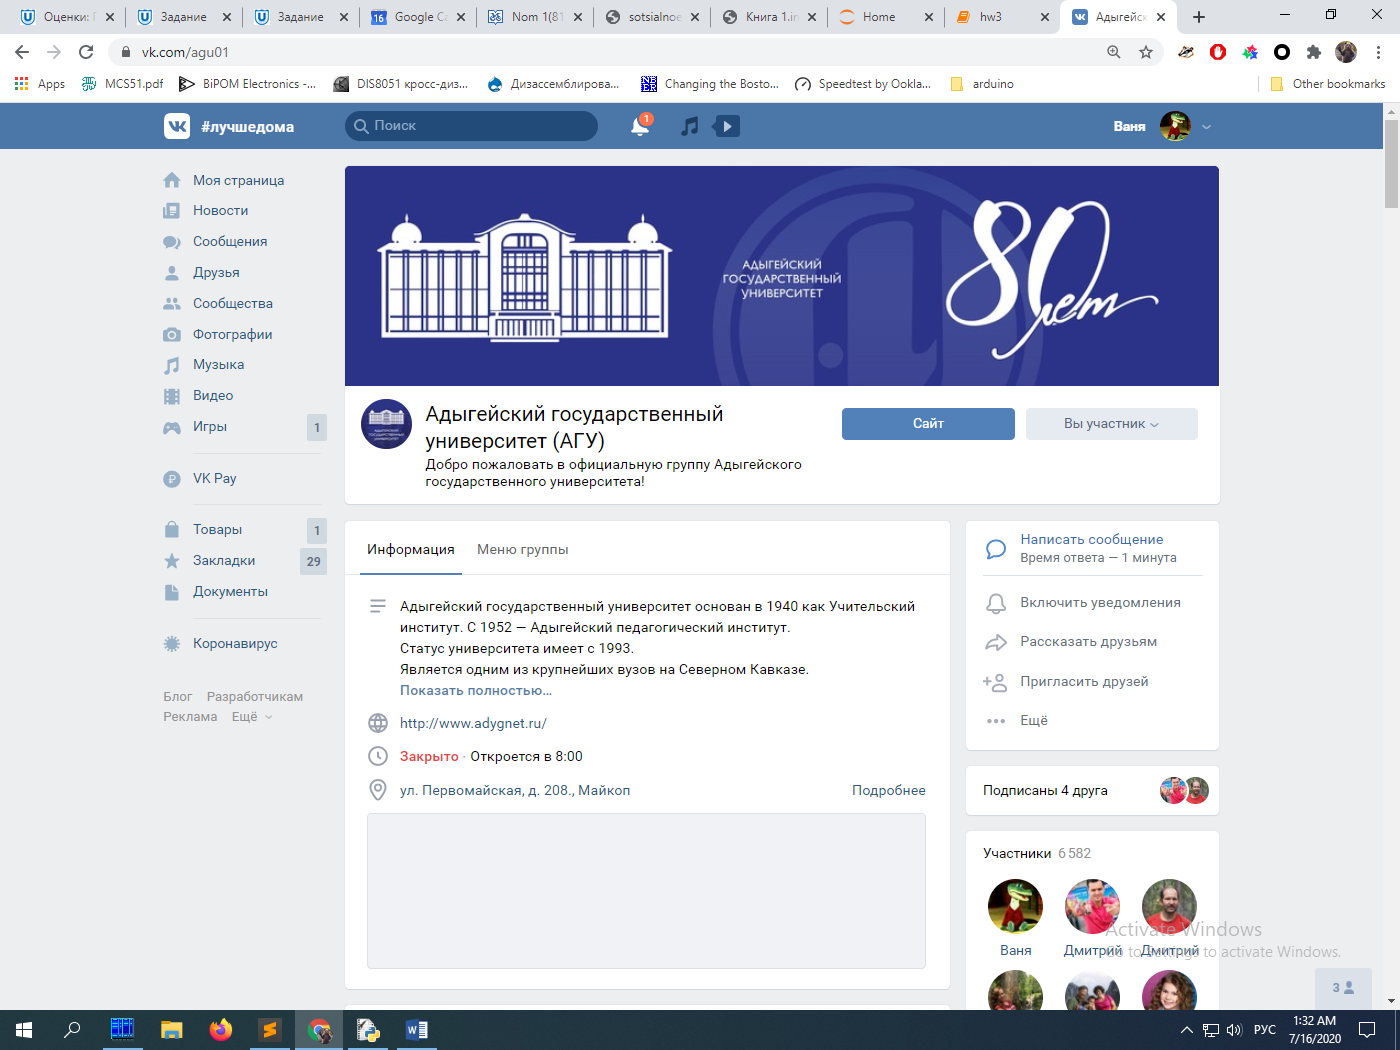

In [1]:
import numpy as np
import pandas as pd
import datetime
import itertools
from collections import Counter
import requests
import json

%matplotlib inline

In [2]:
df = pd.read_csv("agu.csv")
df.head()

,id,first_name,last_name,is_closed,can_access_closed,sex,domain,country_id,country_title,bdate,...,status_audio_artist,status_audio_id,status_audio_owner_id,status_audio_title,status_audio_duration,status_audio_url,status_audio_date,status_audio_is_hq,status_audio_main_artists,status_audio_genre_id
0,130892,Влад,Синеок,True,False,2,id130892,1.0,Россия,10.5.1985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,153472,Серёга,Сороколатов,False,True,2,pysu4,1.0,Россия,30.4.1989,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,163719,Олег,Проэктор,False,True,2,misterpro,1.0,Россия,19.3.1986,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,205024,Дмитрий,Мартыненко,False,True,2,id205024,1.0,Россия,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,209802,Зверь,Фоморов,True,False,1,fomors_beast,1.0,Россия,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print("Количество участников:", df.shape[0])

Количество участников: 6581


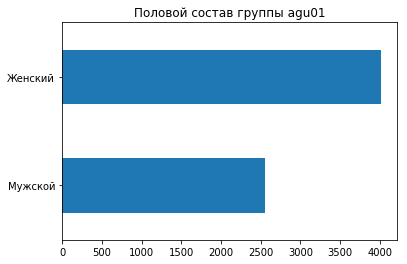

In [4]:
def f(x):
    if x == 2:
        return "Мужской"
    elif x == 1:
        return "Женский"
    return np.nan

df["sex"].map(f).dropna().value_counts().sort_values().plot(kind='barh', title="Половой состав группы agu01")

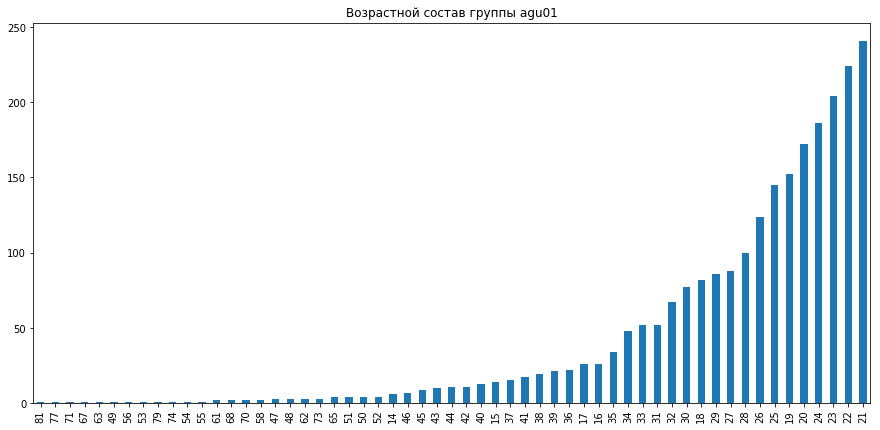

In [5]:
# возрастной состав группы

def f(x):
    try:
        dt = datetime.datetime.strptime(x, '%d.%m.%Y').date()
        diff = datetime.datetime.now().date() - dt        
        return np.trunc(diff.days / 365.25)
    except:
        return np.nan
    
bdates = df["bdate"].map(f).dropna().astype(int)
bdates = bdates[bdates < 90]  # похоже на мусор
bdates.value_counts().sort_values().plot(kind='bar', figsize=(15, 7), title="Возрастной состав группы agu01")

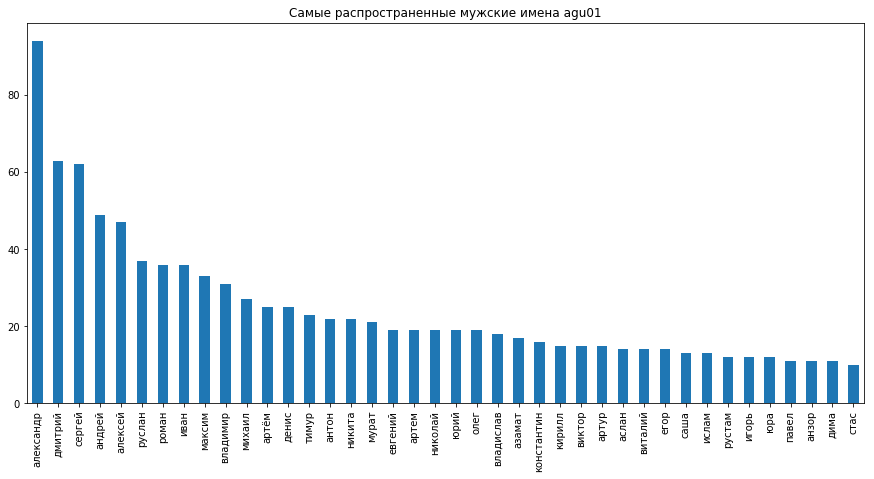

In [24]:
male_names = df[df["sex"] == 2]["first_name"].str.lower()
male_names = male_names[male_names != "deleted"]
male_names.value_counts().sort_values(ascending=False)\
    .head(40).plot(kind='bar', figsize=(15, 7), title="Самые распространенные мужские имена agu01")

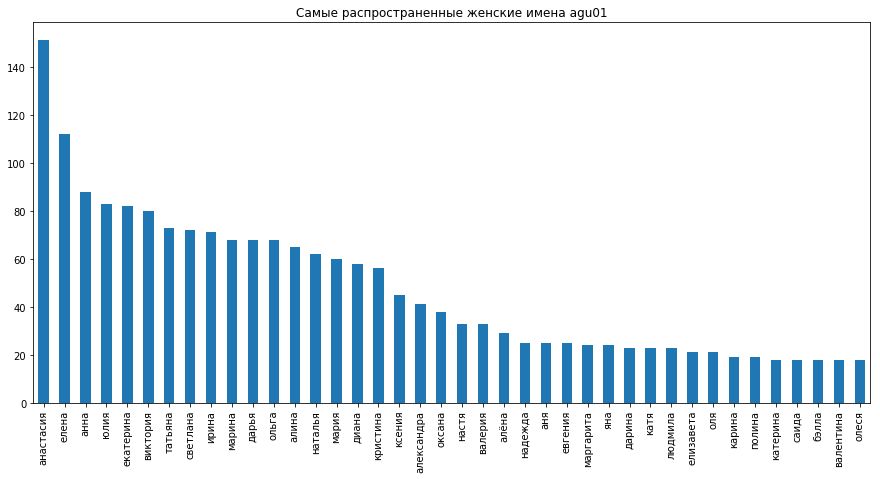

In [25]:
female_names = df[df["sex"] == 1]["first_name"].str.lower()
female_names = female_names[female_names != "deleted"]
female_names.value_counts().sort_values(ascending=False)\
    .head(40).plot(kind='bar', figsize=(15, 7), title="Самые распространенные женские имена agu01")

In [8]:
print("Количество участников с закрытым или удаленным профилем:", 
      df[df["is_closed"] | (df["first_name"] == "DELETED")].shape[0])

Количество участников с закрытым или удаленным профилем: 1359


In [9]:
df_posts = pd.read_csv("agu_posts.csv")
df_posts.sort_values(by=["likes_count", "comments_count"], ascending=False).head()

,from_id,owner_id,domain,date,text,copy_text,copy_date,likes_count,comments_count,reposts,views,likers,comments,commentators
68,-133450,-133450,https://vk.com/feed?w=wall-133450_7012,2020-05-24 14:48:07,"Прошёл год, как пропала Даша. В шестнадцать...",NaN,NaN,174,7,1,3623,"209802,562487,686674,1661991,1884493,3559765,4...",Светлая память🙏🏻 | А что с ней случилось | Све...,"440606579,27428261,173166559"
76,-133450,-133450,https://vk.com/feed?w=wall-133450_6956,2020-05-15 14:41:38,"Утопающий в зелени, любимый, родной... Он тако...",NaN,NaN,148,45,4,3938,"206261992,130892,653640,686674,1884493,4771577...",Крутая общага | Славное время | Любовь вечная ...,"511927014,130892,365659512,263680145,213657982..."
71,-133450,-133450,https://vk.com/feed?w=wall-133450_7007,2020-05-23 10:22:31,ВРЕМЯ ТВОРИТЬ ДОБРО Студенты Адыгейского гос...,NaN,NaN,65,2,1,2547,"27378328,28108814,122678968,143748857,15659110...",🤝 | Сотрудники и преподаватели хоть сами согла...,"377249626,210167720"
1,-133450,-133450,https://vk.com/feed?w=wall-133450_7113,2020-07-15 08:17:25,"Сегодня, 15 июля свой 55-й день рождения отмеч...",NaN,NaN,62,0,1,831,"290268617,484321245,342341436,325937504,672746...",NaN,NaN
9,-133450,-133450,https://vk.com/feed?w=wall-133450_7102,2020-07-08 16:06:25,2 июля состоялся первый в истории Адыгейского ...,NaN,NaN,62,0,2,1711,"135393204,560379093,87159841,11684962,15025633...",NaN,NaN


In [10]:
print("Самый лайкнутый пост из последних 100:")

most_liked = df_posts.loc[df_posts.likes_count.idxmax()]

print(most_liked.text)
print("Лайков:", most_liked.likes_count)

Самый лайкнутый пост из последних 100:
Прошёл год, как пропала Даша.    В шестнадцать лет кажется, что вот она, настоящая жизнь — только начинается. Что там, впереди, за выпускными экзаменами тебя ждет целый мир, полный возможностей и свободы.    Но в отношении Даши Шопиной судьба распорядилась по-другому.    Гулким эхом отозвалась эта трагедия в наших сердцах. Обидно и горько.    Выражаем искренние слова поддержки семье Шопиных. Светлая память Даше.
Лайков: 174


In [11]:
print("Самый обсуждаемый пост из последних 100:")

most_commented = df_posts.loc[df_posts.comments_count.idxmax()]

print(most_commented.text)
print("Комментариев:", most_commented.comments_count)

Самый обсуждаемый пост из последних 100:
Утопающий в зелени, любимый, родной... Он такой один — любимый университет.  А что для вас АГУ? Опишите университет в трех словах!
Комментариев: 45


In [12]:
df["quotes"].dropna()

3                    “Кто не смирился — тот не побежден!”
12                               Ну чтобы всем.....))))))
18      No Totti No Party  — Нет, Киркоров мне не нрав...
26      ~~~~~~~~~ - Может быть, просто не тот человек?...
44                       Все, что ни делается - к лучшему
                              ...                        
5984    Лично моя цитата "Живи сегодняшним днем, но не...
6021       И ¢еρдце ÿ меня σднσ.  И в ¢еρдце ÿ меня σдüн.
6162                         Перемен! Требуют наши сердца
6265    We have a life within us that's quite differen...
6515    Тот, кто ищет миллионы, весьма редко их находи...
Name: quotes, Length: 233, dtype: object

In [13]:
df.id.to_csv("agu_ids.csv", index=False, header=False) # сохранение идов для загрузки

In [14]:
df_subs = pd.read_csv("agu_users_subs.csv")
df_subs.head()

,user_id,groups,publics
0,153472,"64599002,40602553,41968638,48267027,62675857","1113595,55359415,40316705,60777940,38379853,85..."
1,163719,NaN,"23403635,57851075,33377621,68988957,80941590,3..."
2,205024,"43948962,4423,5847773,48749899,49204880,620233...","24943107,185869711,130756946,107875,4462929,29..."
3,212126,59165594,"188547814,33621085,127925490,87089684,17722950..."
4,329293,"9410453,40400929,73424025,120428878,132357542","52860645,195596239,166068557,156523840,5964994..."


In [33]:
groups = df_subs.groups.dropna().str.split(",").tolist()
groups = list(itertools.chain(*groups))

groups = pd.DataFrame(Counter(groups).most_common(100), columns=['id', 'subscribers'])
groups['name'] = pd.Series(dtype='string')
 
# загрузка названий групп из вк апи
pars = {"v" : "5.103",
       "access_token" : "92da160e6f2d5ada2c79f1e224edd23343940eea30fe38f7f22f59cd7af02a5102f3e90f7c85f62e8b5c7",
       "group_ids" : ",".join(groups["id"].tolist()),
       "fields" : "name"}
req = requests.get('https://api.vk.com/method/groups.getById', params = pars)

# отображение идов в названия
for g in json.loads(req.text)["response"]:
    groups.loc[groups.id.astype(int) == g["id"], "name"] = g["name"] 

print("Самые популярные группы у подписчиков agu01:")
groups.head(20)

Самые популярные группы у подписчиков agu01:


,id,subscribers,name
0,133450,1473,Адыгейский государственный университет (АГУ)
1,43097537,259,Союз Студентов и Аспирантов АГУ
2,73092716,209,Додо Пицца Майкоп
3,148289111,114,Строки пыльных книг | Литература
4,83875167,81,Gindir Dunya - Gendir Dunya
5,491,80,Comedy Club
6,133974750,80,Анатомия
7,36042178,80,Türkmen sungat älemi
8,19043,78,Европа Плюс
9,93522989,78,Студенческий Спортивный клуб АГУ


In [34]:
publics = df_subs.publics.dropna().str.split(",").tolist()
publics = list(itertools.chain(*publics))

publics = pd.DataFrame(Counter(publics).most_common(100), columns=['id', 'subscribers'])
publics['name'] = pd.Series(dtype='string')
 
# загрузка названий групп из вк апи
pars = {"v" : "5.103",
       "access_token" : "92da160e6f2d5ada2c79f1e224edd23343940eea30fe38f7f22f59cd7af02a5102f3e90f7c85f62e8b5c7",
       "group_ids" : ",".join(publics["id"].tolist()),
       "fields" : "name"}
req = requests.get('https://api.vk.com/method/groups.getById', params = pars)

for g in json.loads(req.text)["response"]:
    publics.loc[publics.id.astype(int) == g["id"], "name"] = g["name"] 

# отображение идов в названия
print("Самые популярные паблики у подписчиков agu01:")
publics.head(20)

Самые популярные паблики у подписчиков agu01:


,id,subscribers,name
0,1113595,1263,МАЙКОП АДЫГЕЯ
1,61408089,801,Признавашки АГУ
2,35593725,777,Майкоп Сити
3,27895931,747,Новинки Музыки 2020 | Лучшая Музыка
4,32771925,709,Типичная Адыгея
5,55034907,704,Привет
6,43215063,642,Киномания ► Новинки 2020
7,35287407,622,JOY LAND Майкоп
8,22798006,581,Киномания | Фильмы | Сериалы
9,85774102,574,Подслушано Майкоп
